### Data Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

## from random import sample

### Import Data

In [2]:
df = pd.read_csv('train_patient3.csv')
df.shape

(1552210, 43)

In [3]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id', 'time'],
      dtype='object')

In [4]:
df['SepsisLabel'].value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

In [5]:
df['SepsisLabel'].value_counts(normalize=True)

0    0.982015
1    0.017985
Name: SepsisLabel, dtype: float64

In [6]:
len(df['Patient_id'].unique())

40336

In [7]:
sepsis_pat = np.array(df.groupby(['Patient_id']) \
                          ['SepsisLabel'].sum())
len(sepsis_pat[sepsis_pat > 0])

2932

#### Missing values by features 

In [8]:
(df.isnull().sum().sort_values(ascending=False)/df.isnull().count()).sort_values(ascending=False)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
TroponinI           0.990477
Bilirubin_total     0.985092
Alkalinephos        0.983932
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
SaO2                0.965494
EtCO2               0.962868
Phosphate           0.959863
HCO3                0.958106
Chloride            0.954603
BaseExcess          0.945790
PaCO2               0.944401
Calcium             0.941161
Platelets           0.940595
Creatinine          0.939044
Magnesium           0.936896
WBC                 0.935932
BUN                 0.931344
pH                  0.930697
Hgb                 0.926176
FiO2                0.916658
Hct                 0.911460
Potassium           0.906891
Glucose             0.828943
Temp                0.661627
Unit1               0.394251
Unit2               0.394251
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP           

Compare proportion of missing data with Sepsis patiens and non-Sepsis patients 

In [9]:
nonsep_df = df[df['SepsisLabel'] == 0]
sepsis_df = df[df['SepsisLabel'] == 1]

In [10]:
(sepsis_df.isnull().sum().sort_values(ascending=False)/sepsis_df.isnull().count()).sort_values(ascending=False)

Bilirubin_direct    0.995343
TroponinI           0.988537
Fibrinogen          0.988179
Bilirubin_total     0.971163
Alkalinephos        0.967760
AST                 0.967617
PTT                 0.956154
Phosphate           0.941073
HCO3                0.938172
SaO2                0.935127
Chloride            0.931509
Lactate             0.929754
Platelets           0.924810
Creatinine          0.922553
WBC                 0.916714
Magnesium           0.914243
Calcium             0.913885
BUN                 0.909443
Hgb                 0.903819
BaseExcess          0.897693
EtCO2               0.892642
Hct                 0.887770
PaCO2               0.886982
Potassium           0.868140
pH                  0.866385
FiO2                0.820175
Glucose             0.817631
Temp                0.660553
Unit2               0.450745
Unit1               0.450745
DBP                 0.298861
SBP                 0.151956
Resp                0.143430
O2Sat               0.103597
MAP           

In [12]:
(nonsep_df.isnull().sum().sort_values(ascending=False)/nonsep_df.isnull().count()).sort_values(ascending=False)

Bilirubin_direct    0.998124
Fibrinogen          0.993497
TroponinI           0.990513
Bilirubin_total     0.985347
Alkalinephos        0.984228
AST                 0.984072
Lactate             0.974096
PTT                 0.970823
SaO2                0.966050
EtCO2               0.964155
Phosphate           0.960207
HCO3                0.958471
Chloride            0.955026
BaseExcess          0.946671
PaCO2               0.945453
Calcium             0.941660
Platelets           0.940884
Creatinine          0.939346
Magnesium           0.937311
WBC                 0.936284
pH                  0.931875
BUN                 0.931745
Hgb                 0.926585
FiO2                0.918425
Hct                 0.911894
Potassium           0.907601
Glucose             0.829150
Temp                0.661647
Unit1               0.393216
Unit2               0.393216
DBP                 0.313726
Resp                0.153731
SBP                 0.145656
O2Sat               0.131106
MAP           

#### Missing values by feature class

In [13]:
lab=['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

demo = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

label = ['SepsisLabel']

In [14]:
lab_df = df[lab]
vitals_df = df[vitals]
demo_df = df[demo]

In [15]:
np.mean((lab_df.isnull().sum() / lab_df.shape[0]))

0.948179345280897

In [16]:
np.mean((vitals_df.isnull().sum() / vitals_df.shape[0]))

0.3239024519878109

In [17]:
np.mean((demo_df.isnull().sum() / demo_df.shape[0]))

0.1314177849646633

Plotting the missing values in percentage.

In [1]:
mis_values = (df.isnull().sum() / df.shape[0]) * 100

NameError: name 'df' is not defined

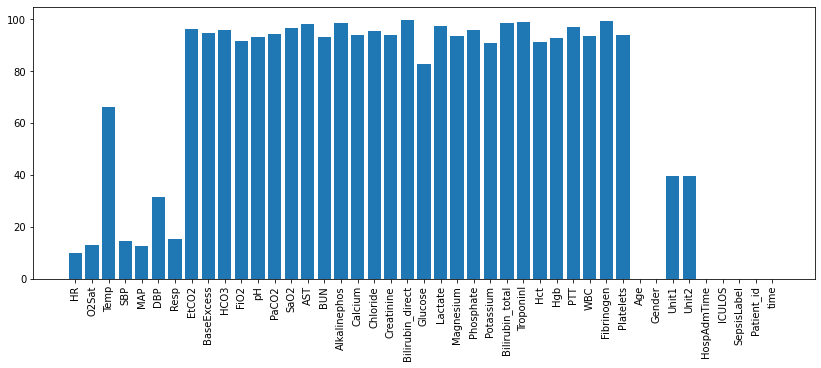

In [19]:
rcParams['figure.figsize'] = 14, 5
_ = plt.bar(mis_values.index, mis_values)
_ = plt.xticks(mis_values.index, rotation=90)

In [20]:
selected_cols = list(mis_values[mis_values < 83].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'Glucose',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_id',
 'time']

In [21]:
len(selected_cols)

17

In [22]:
df=df[selected_cols]

In [23]:
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.08,1,NaN,NaN,-0.01,1,0,0,0
1,85.0,100.0,NaN,121.0,79.67,NaN,16.0,NaN,60.08,1,NaN,NaN,-0.01,2,0,0,1
2,72.0,100.0,NaN,110.0,72.67,NaN,16.0,259.0,60.08,1,NaN,NaN,-0.01,3,0,0,2
3,74.0,100.0,NaN,109.0,75.00,NaN,16.0,NaN,60.08,1,NaN,NaN,-0.01,4,0,0,3
4,75.0,100.0,37.39,104.0,70.00,NaN,16.0,NaN,60.08,1,NaN,NaN,-0.01,5,0,0,4


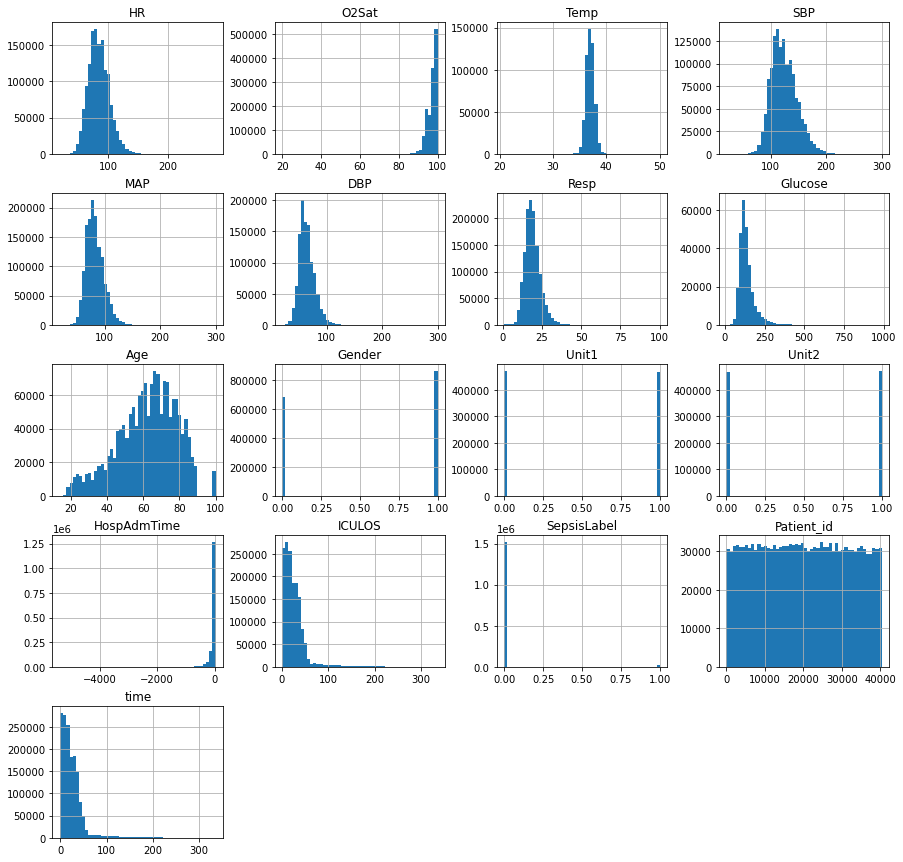

In [24]:
df.hist(figsize=(15, 15), bins=50);

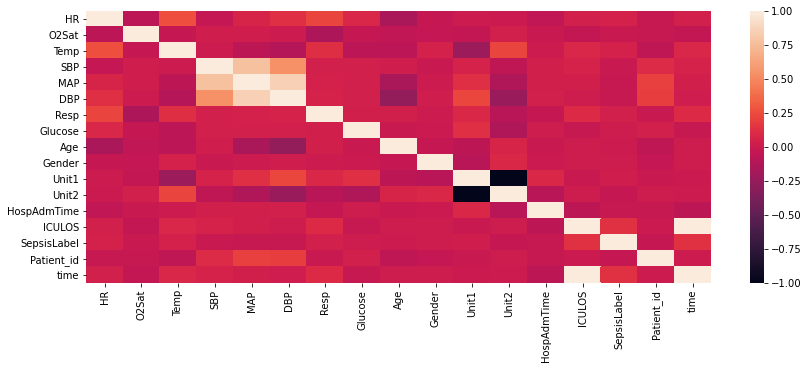

In [27]:
corr = df.corr()
sns.heatmap(corr);

 - Correlation between MAP, SBP and DBP since MAP = (SBP + 2*DBP) / 3
 - Unit1 and Unit2 are proportianial and no correlation with SepsisLable
 - Also drop HospAdmTime, Patient_Id and time

In [31]:
df.drop(['SBP', "DBP"], axis = 1, inplace = True)

KeyError: "['SBP' 'DBP'] not found in axis"

In [32]:
df.drop(['Unit1', "Unit2"], axis = 1, inplace = True)

KeyError: "['Unit1' 'Unit2'] not found in axis"

In [33]:
df.drop(["HospAdmTime", 'Patient_id','time'], axis = 1, inplace = True)

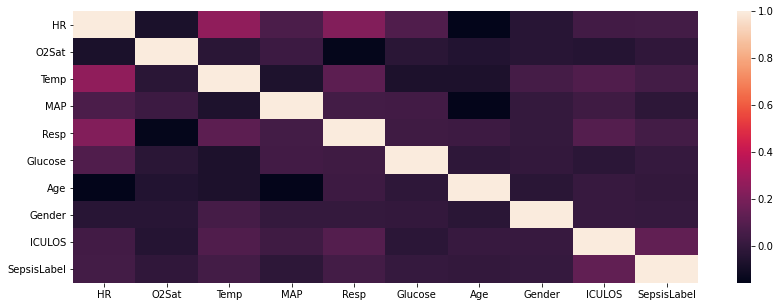

In [34]:
corr = df.corr()
sns.heatmap(corr);

In [35]:
df.drop(['Glucose', "O2Sat"], axis = 1, inplace = True)

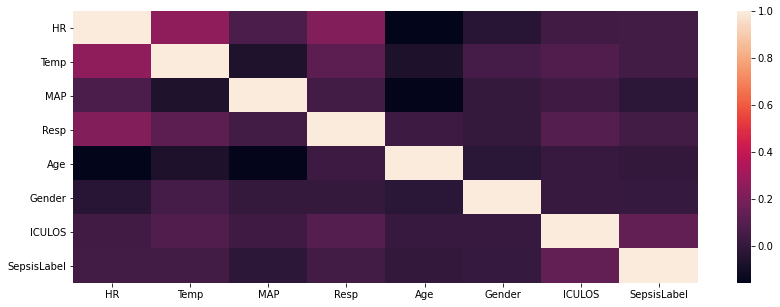

In [36]:
corr = df.corr()
sns.heatmap(corr);

In [37]:
(df.isnull().sum().sort_values(ascending=False)/df.isnull().count()).sort_values(ascending=False)

Temp           0.661627
Resp           0.153546
MAP            0.124513
HR             0.098826
SepsisLabel    0.000000
ICULOS         0.000000
Gender         0.000000
Age            0.000000
dtype: float64

In [38]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [39]:
# final selected features
df.head()

,HR,Temp,MAP,Resp,Age,Gender,ICULOS,SepsisLabel
0,85.0,37.39,79.67,16.0,60.08,1,1,0
1,85.0,37.39,79.67,16.0,60.08,1,2,0
2,72.0,37.39,72.67,16.0,60.08,1,3,0
3,74.0,37.39,75.00,16.0,60.08,1,4,0
4,75.0,37.39,70.00,16.0,60.08,1,5,0


In [40]:
df.shape

(1552210, 8)

## Random Forest classifier
Feature importance

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
y = df['SepsisLabel']
df.drop(['SepsisLabel'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split( df , y , test_size=.3, random_state=40)


In [43]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [44]:
# Get numerical feature importances
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.24
Variable: ICULOS               Importance: 0.18
Variable: Temp                 Importance: 0.16
Variable: MAP                  Importance: 0.15
Variable: HR                   Importance: 0.14
Variable: Resp                 Importance: 0.11
Variable: Gender               Importance: 0.02


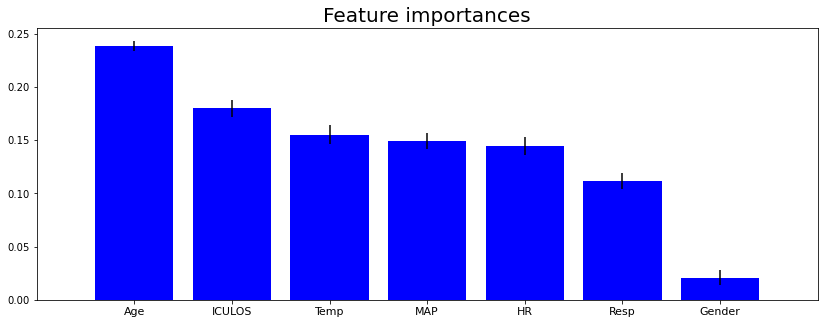

In [46]:
# Plot the feature importances of the forest
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances", size = 20)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ['Age','ICULOS', 'Temp', 'MAP','HR', 'Resp', 'Gender'], size = 11)
plt.xlim([-1, X_train.shape[1]])

plt.savefig('featuresRF.png')
plt.show()